Firstly we will import the required libraries to work using KMeans

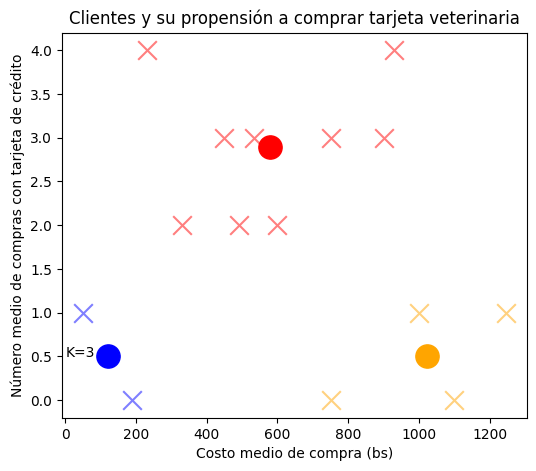

    costo_compra  compras_credito  cluster
0            750                3        0
1           1245                1        1
2            230                4        0
3            533                3        0
4            490                2        0
5           1000                1        1
6            190                0        2
7            900                3        0
8            600                2        0
9             50                1        2
10          1100                0        1
11           930                4        0
12           450                3        0
13           330                2        0
14           750                0        1
Centros de los clusters:
[[0.44286378 0.72222222]
 [0.81485356 0.125     ]
 [0.05857741 0.125     ]]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

clients = pd.DataFrame({
    "costo_compra": [750, 1245, 230, 533, 490, 1000, 190, 900, 600, 50, 1100, 930, 450, 330, 750],
    "compras_credito": [3, 1, 4, 3, 2, 1, 0, 3, 2, 1, 0, 4, 3, 2, 0]
})

scaler = MinMaxScaler().fit(clients.values)
clients_scaled = pd.DataFrame(scaler.transform(clients.values), columns=["costo_compra", "compras_credito"])

kmeans = KMeans(n_clusters=3).fit(clients_scaled)

clients["cluster"] = kmeans.labels_

plt.figure(figsize=(6, 5), dpi=100)
colors = ["red", "orange", "blue", "green", "purple"]
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        clients[clients["cluster"] == cluster]["costo_compra"],
        clients[clients["cluster"] == cluster]["compras_credito"],
        marker="x",
        s=180,
        color=colors[cluster],
        alpha=0.5,
    )
    plt.scatter(
        kmeans.cluster_centers_[cluster][0] * (clients["costo_compra"].max() - clients["costo_compra"].min()) + clients["costo_compra"].min(),
        kmeans.cluster_centers_[cluster][1] * (clients["compras_credito"].max() - clients["compras_credito"].min()) + clients["compras_credito"].min(),
        marker="o",
        s=280,
        color=colors[cluster],
    )

plt.title("Clientes y su propensión a comprar tarjeta veterinaria")
plt.xlabel("Costo medio de compra (bs)")
plt.ylabel("Número medio de compras con tarjeta de crédito")
plt.text(1.1, 0.5, "K={}".format(kmeans.n_clusters))
plt.show()

print(clients)
print("Centros de los clusters:")
print(kmeans.cluster_centers_)
